In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('creditcard.csv')
data.head()

#V1 V2 V3......V28 are transformed features. Only Time and Amount are not transformed. 
#These were given as it is by the dataset provider due to confidentiality issues

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
data.isnull().values.any()

False

In [48]:
# assign fraud to class value 1 and normal to class value 0 from the dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


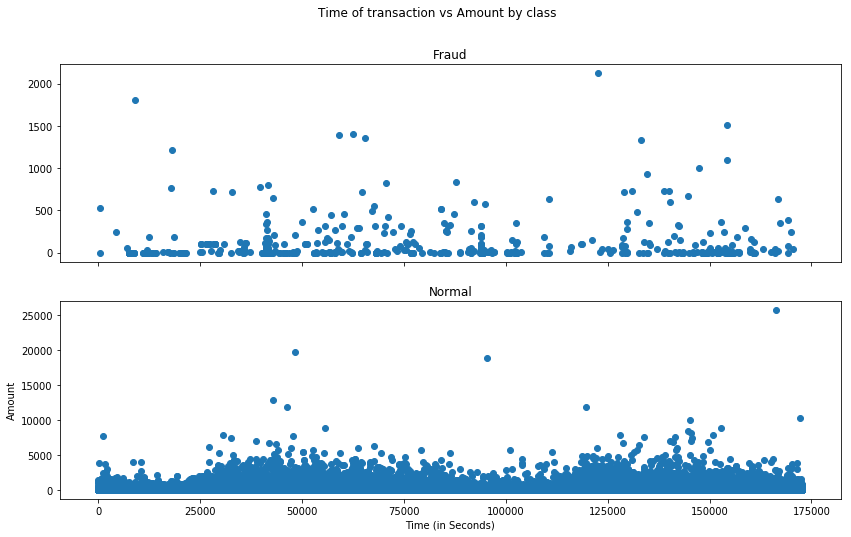

In [55]:
# This will show how much fraudulent and Normal transactions occur during certain time frame 

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [50]:
#created a sample for training and stored it in data1
data1= data.sample(frac = 0.1,random_state=1)

In [51]:
columns = data1.columns.tolist()

# Filtered the columns other than class which we have to predict 
columns = [c for c in columns if c not in ["Class"]]

# Stored the variable we are predicting 
target = "Class"

X = data1[columns]
Y = data1[target]

In [52]:
#Fit the decision tree model

from sklearn import tree
dec = tree.DecisionTreeClassifier(max_depth=2)
dec.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
#test the score for sample 
dec.score(X[:110],Y[:110])

0.990909090909091